In [1]:
# TRINH Nhat-nam - cls578
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
import scipy.spatial
import scipy.optimize as o


In [2]:
def gaussian_kernel(X,Xprime, lengthscale=0.0696,  var=1.9085):
    gamma = 1/(2*lengthscale)
    dists = scipy.spatial.distance.cdist(X,Xprime,metric='sqeuclidean')
    return var*np.exp(-gamma*dists)

5.000000018156134
4.999999998155251
4.999999997999973
4.999999998407804
5.000000000951358


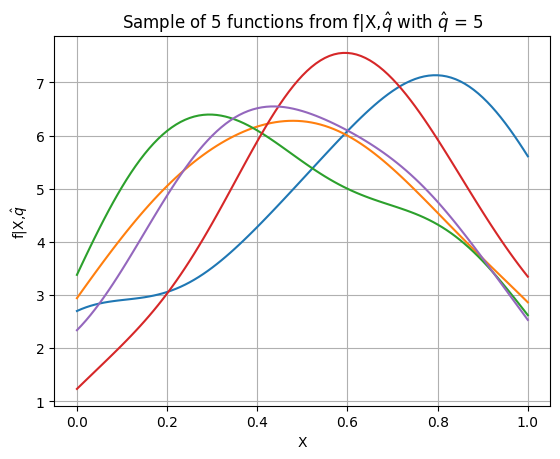

In [133]:
l = 101
i = np.arange(1,l+1)

X = (i-1)/(l-1)
X_reshape = X.reshape(-1,1)
w = 1/(l-1) * np.ones(l)
w[0] = w[l-1] = 1/(2*l-1)

K = gaussian_kernel(X_reshape,X_reshape,lengthscale=0.0696,  var=1.9085)
q = 5


wTKw_1 = 1/(w.T@K@w)
mean = K@w * wTKw_1 * q
v = (K @ w * np.sqrt(wTKw_1)).reshape(-1,1)
std = K - v @ v.T


for i in range(5):
    f_distribution_constraint = np.random.multivariate_normal(mean,std)
    print(w.T@f_distribution_constraint)
    plt.plot(X,f_distribution_constraint)

plt.title("Sample of 5 functions from f|X,$\hat{q}$ with $\hat{q}$ = " + str(q))
plt.xlabel('X')
plt.ylabel('f|X,$\hat{q}$')
plt.grid('off')


In [4]:
def g(x):
    return - np.sin(6*np.pi*x)**2 + 6*x**2 - 5*x**4 + 3/2

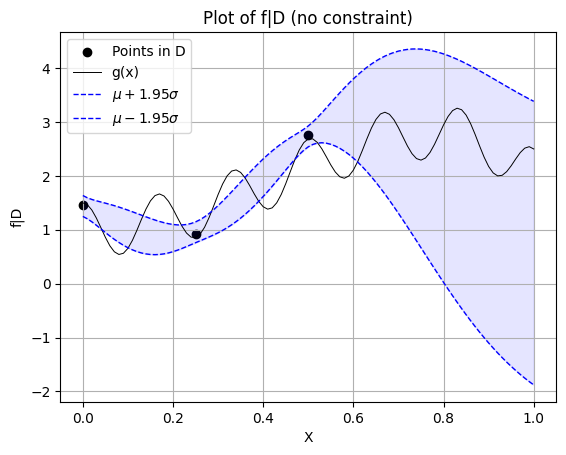

In [82]:
# Specific dataset - no constraint
D = np.array([[0, 1.46], [0.25, 0.93], [0.5, 2.76]])

noise = 0.01
x_s,y_s = D[:,0], D[:,1]
x_s_reshape = x_s.reshape(-1,1)
y_s_reshape = y_s.reshape(-1,1)

mu_star = gaussian_kernel(x_s_reshape,X_reshape).T @ np.linalg.inv((gaussian_kernel(x_s_reshape,x_s_reshape) + noise*np.eye(3))) @ y_s_reshape
sigma_star = gaussian_kernel(X_reshape,X_reshape) - gaussian_kernel(x_s_reshape, X_reshape).T @ np.linalg.inv((gaussian_kernel(x_s_reshape,x_s_reshape) + noise*np.eye(3))) @  gaussian_kernel(x_s_reshape, X_reshape)
mu_star = mu_star.flatten()

plt.scatter(x_s,y_s, color="black", label="Points in D")



plt.plot(X,g(X), color = "black", label="g(x)", linewidth = 0.7)

# upper bound, lower bound
ub = mu_star+1.95*np.sqrt(np.diag(sigma_star))
lb = mu_star-1.95*np.sqrt(np.diag(sigma_star))
plt.plot(X, ub, linestyle='--', color="blue",linewidth=1, label="$\mu+1.95 \sigma$")
plt.plot(X, lb, linestyle='--', color="blue", linewidth=1, label="$\mu-1.95 \sigma$")
plt.fill_between(X,lb,ub, alpha=0.1, color="blue")

plt.title("Plot of f|D (no constraint)")
plt.xlabel('X')
plt.ylabel('f|D')
plt.grid('off')
plt.legend()

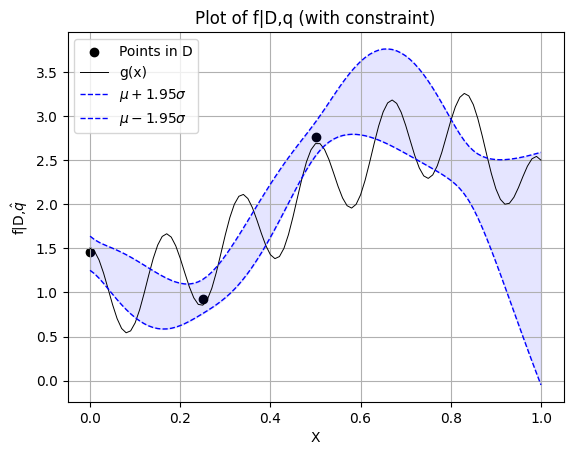

In [ ]:
# Specific dataset - with  constraint
D = np.array([[0, 1.46], [0.25, 0.93], [0.5, 2.76]])
q = 2

noise = 0.01
x_s,y_s = D[:,0], D[:,1]
x_s_reshape = x_s.reshape(-1,1)
y_s_reshape = y_s.reshape(-1,1)

# parameters for no constraint, X is a set of datapoints
mu_star = gaussian_kernel(x_s_reshape,X_reshape).T @ np.linalg.inv((gaussian_kernel(x_s_reshape,x_s_reshape) + noise*np.eye(3))) @ y_s_reshape
sigma_star = gaussian_kernel(X_reshape,X_reshape) - gaussian_kernel(x_s_reshape, X_reshape).T @ np.linalg.inv((gaussian_kernel(x_s_reshape,x_s_reshape) + noise*np.eye(3))) @  gaussian_kernel(x_s_reshape, X_reshape)
mu_star = mu_star.flatten()


# we add the constraint (eq 29 from oswin's lecture notes)
wTsigw_1 = 1/(w.T @ sigma_star @ w)
mu_const = mu_star + sigma_star@w * wTsigw_1 * (q - w.T@mu_star)
v = (sigma_star @ w * np.sqrt(wTsigw_1)).reshape(-1,1)
sig_const = sigma_star - v @ v.T


plt.scatter(x_s,y_s, color="black", label="Points in D")



plt.plot(X,g(X), color = "black", label="g(x)", linewidth = 0.7)
# upper bound, lower bound
ub = mu_const+1.95*np.sqrt(np.diag(sig_const))
lb = mu_const-1.95*np.sqrt(np.diag(sig_const))
plt.plot(X, ub, linestyle='--', color="blue",linewidth=1, label="$\mu+1.95 \sigma$")
plt.plot(X, lb, linestyle='--', color="blue", linewidth=1, label="$\mu-1.95 \sigma$")
plt.fill_between(X,lb,ub, alpha=0.1, color="blue")

plt.title("Plot of f|D,q (with constraint)")
plt.xlabel('X')
plt.ylabel('f|D,$\hat{q}$')
plt.grid('off')
plt.legend()

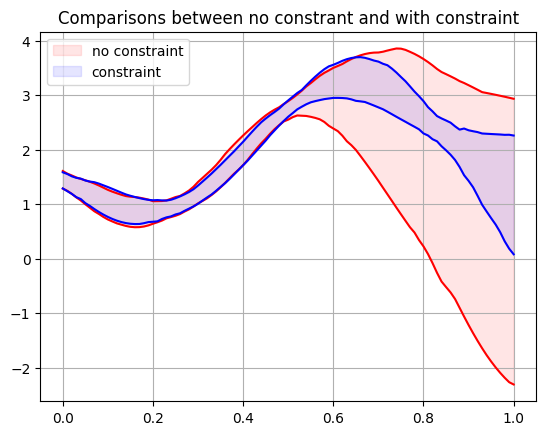

In [132]:
f_no_constraint = np.random.multivariate_normal(mu_star,sigma_star,size=100)
f_constraint = np.random.multivariate_normal(mu_const,sig_const,size=100)

f1 = np.quantile(f_no_constraint, q=0.95, axis=0)
f2 = np.quantile(f_no_constraint, q=0.05, axis=0)
f3 = np.quantile(f_constraint,q= 0.95, axis=0)
f4 = np.quantile(f_constraint,q= 0.05, axis=0)

plt.plot(X,f1,color='red')
plt.plot(X,f2,color='red')
plt.plot(X,f3,color='blue')
plt.plot(X,f4,color='blue')


plt.fill_between(X, f1, f2, color='red', alpha=0.1, label="no constraint")
plt.fill_between(X, f3, f4, color='blue', alpha=0.1, label="constraint")
plt.title('Comparisons between no constrant and with constraint')
plt.legend()
plt.grid('on')

In [131]:
print(w.T@f_no_constraint[4,:])

1.220967814332328
